<a href="https://colab.research.google.com/github/Deewakar2412/EDA-DMart-TASK-05/blob/main/EDA_Dmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel file into a pandas DataFrame and display the first 5 rows
df = pd.read_excel('/content/dMart.xlsx')
display(df.head())

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Chana Dal,NaN,49.0,42.0,Grocery,Dals,500 gm,India,Grocery > Dals
1,Chana Dal,NaN,96.0,80.0,Grocery,Dals,1 kg,India,Grocery > Dals
2,Rajma White,NaN,112.0,102.0,Grocery,Pulses,500 gm,India,Grocery > Pulses
3,Rajma Kashmiri Red,NaN,101.0,81.0,Grocery,Pulses,500 gm,India,Grocery > Pulses
4,Rajma Red Small,NaN,61.0,56.0,Grocery,Pulses,500 gm,India,Grocery > Pulses


In [ ]:
# Check for null values in each column
df.isnull().sum()

,0
Name,1
Brand,400
Price,1
DiscountedPrice,1
Category,3
SubCategory,3
Quantity,1
Description,2
BreadCrumbs,3


In [ ]:
# Display rows where 'Name' is null to investigate
null_names_df = df[df['Name'].isnull()]
display(null_names_df)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
3016,NaN,NaN,89.0,69.0,Home & Kitchen,Home & Kitchen,1 U,- Material : Stainless Steel- Shape : Round- T...,Home & Kitchen


In [ ]:
# Print the description of the row with null 'Name' to identify the product
Description = df.loc[3016, 'Description']
print(Description)

- Material : Stainless Steel- Shape : Round- Type : Serving StandPack Contents - Stainless Steel Cutlery Holder : 1 Unit


In [ ]:
# Fill the null 'Name' value based on the description
df.loc[df["Name"].isnull(), "Name"] = "Stainless Steel Cutlery Holder"

In [ ]:
# Check for null values again after filling 'Name'
df.isnull().sum()

,0
Name,0
Brand,400
Price,1
DiscountedPrice,1
Category,3
SubCategory,3
Quantity,1
Description,2
BreadCrumbs,3


In [ ]:
# Fill null values in the 'Brand' column with "Unknown"
df["Brand"] = df["Brand"].fillna("Unknown")

In [ ]:
# Check for null values after filling 'Brand'
df.isnull().sum()

,0
Name,0
Brand,0
Price,1
DiscountedPrice,1
Category,3
SubCategory,3
Quantity,1
Description,2
BreadCrumbs,3


In [ ]:
# Fill null values in 'Price' and 'DiscountedPrice' columns with their median values
df["Price"] = df["Price"].fillna(df["Price"].median())
df["DiscountedPrice"] = df["DiscountedPrice"].fillna(df["DiscountedPrice"].median())

In [ ]:
# Check for null values after filling 'Price' and 'DiscountedPrice'
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
DiscountedPrice,0
Category,3
SubCategory,3
Quantity,1
Description,2
BreadCrumbs,3


In [ ]:
# Display rows where 'Category' is null to investigate
null_category_df = df[df['Category'].isnull()]
display(null_category_df)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
619,Stainless Steel Idli Maker with Lid,Keyur Kitchenware,900.0,499.0,NaN,NaN,1 Unit,_x000D_\n- Container Material : Stainless Stee...,NaN
621,Pigeon ESS Non-Stick Gift Set - Red,Pigeon,2895.0,1359.0,NaN,NaN,7 Pcs,_x000D_\n-Specifications :_x000D_\n- Coating :...,NaN
622,Wonderchef Milano Set - Red,Wonderchef,4200.0,1999.0,NaN,NaN,4 pcs,_x000D_\n- Adorn your kitchen with this beauti...,NaN


In [ ]:
# Fill null values in 'Category', 'SubCategory', and 'BreadCrumbs' with "Unknown"
df["Category"] = df["Category"].fillna("Unknown")
df["SubCategory"] = df["SubCategory"].fillna("Unknown")
df["BreadCrumbs"] = df["BreadCrumbs"].fillna("Unknown")

In [ ]:
# Check for null values after filling 'Category', 'SubCategory', and 'BreadCrumbs'
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
DiscountedPrice,0
Category,0
SubCategory,0
Quantity,1
Description,2
BreadCrumbs,0


In [ ]:
# Display rows where 'Quantity' is null to investigate
null_quantity_df = df[df['Quantity'].isnull()]
display(null_quantity_df)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
842,Zeel MT212 Men's Raincoat - Navy Blue : Size XXL,Zeel,1199.0,1049.0,Raincoat,Raincoat,NaN,Specifications- Material : Fabric- Colour : Na...,Raincoat


In [ ]:
# Filter rows with similar characteristics to the one with null 'Quantity' to find likely value
filtered_rows = df[(df['Price'] == 1199.0) & (df['DiscountedPrice'] == 1049.0) & (df['Category'] == 'Raincoat')]
display(filtered_rows)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
841,Zeel MT212 Men's Raincoat - Navy Blue : Size XXL,Zeel,1199.0,1049.0,Raincoat,Raincoat,Size XL,Specifications- Material : Fabric- Colour : Na...,Raincoat
842,Zeel MT212 Men's Raincoat - Navy Blue : Size XXL,Zeel,1199.0,1049.0,Raincoat,Raincoat,NaN,Specifications- Material : Fabric- Colour : Na...,Raincoat


In [ ]:
# Fill the null 'Quantity' value based on the filtered rows
df.loc[df['Quantity'].isnull(), 'Quantity'] = 'Size XL'
display(df.loc[[842]])

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
842,Zeel MT212 Men's Raincoat - Navy Blue : Size XXL,Zeel,1199.0,1049.0,Raincoat,Raincoat,Size XL,Specifications- Material : Fabric- Colour : Na...,Raincoat


In [ ]:
# Display rows where 'Description' is null to investigate
null_description_df = df[df['Description'].isnull()]
display(null_description_df)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
3604,Sugar Free Gold Powder,Sugar Free,150.0,125.0,Packaged Food,Personal Care,100 gm,NaN,Packaged Food > Health & Wellness > Personal Care
4514,Elle 18 Nail Pops Nail Colour - Shade 125,Elle 18,175.0,125.0,Personal Care,Personal Care/Nail Care,5 ml,NaN,Personal Care > Personal Care/Nail Care


In [ ]:
# Filter rows with similar characteristics to the first row with null 'Description'
filtered_rows = df[(df['Quantity'] == '100 gm') & (df['Price'] == 150.0) & (df['DiscountedPrice'] == 125.0)]
display(filtered_rows)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
376,Hershey's Blueberry & Acai Flavored Chocolate,Hershey's,150.0,125.0,Packaged Food,Packaged Food,100 gm,India,Packaged Food
3604,Sugar Free Gold Powder,Sugar Free,150.0,125.0,Packaged Food,Personal Care,100 gm,NaN,Packaged Food > Health & Wellness > Personal Care


In [ ]:
# Filter rows with similar characteristics to the second row with null 'Description'
filtered_rows = df[(df['Quantity'] == '5 ml') & (df['Price'] == 175.0) & (df['DiscountedPrice'] == 125.0)]
display(filtered_rows)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
4514,Elle 18 Nail Pops Nail Colour - Shade 125,Elle 18,175.0,125.0,Personal Care,Personal Care/Nail Care,5 ml,NaN,Personal Care > Personal Care/Nail Care


In [ ]:
# Fill null values in 'Description' with "Not Available"
df["Description"] = df["Description"].fillna("Not Available")

In [ ]:
# Check for null values after filling 'Description'
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
DiscountedPrice,0
Category,0
SubCategory,0
Quantity,0
Description,0
BreadCrumbs,0


In [ ]:
# Check total number of duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [ ]:
# Save the cleaned DataFrame to an Excel file
df.to_excel('dMart_cleaned.xlsx', index=False)

In [ ]:
df

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Chana Dal,Unknown,49.0,42.0,Grocery,Dals,500 gm,India,Grocery > Dals
1,Chana Dal,Unknown,96.0,80.0,Grocery,Dals,1 kg,India,Grocery > Dals
2,Rajma White,Unknown,112.0,102.0,Grocery,Pulses,500 gm,India,Grocery > Pulses
3,Rajma Kashmiri Red,Unknown,101.0,81.0,Grocery,Pulses,500 gm,India,Grocery > Pulses
4,Rajma Red Small,Unknown,61.0,56.0,Grocery,Pulses,500 gm,India,Grocery > Pulses
...,...,...,...,...,...,...,...,...,...
5184,Lotus Herbals Rosetone Rose Petals Facial Skin...,Lotus,315.0,270.0,Personal Care,Skin Care,100 ml,Key Features- Lotus Herbals Rose Tone Rose Pet...,Personal Care > Skin Care
5185,Vaseline Sun Protection & Cooling Body Serum L...,Vaseline,349.0,249.0,Personal Care,Skin Care,180 ml,Key Features- Vaseline&rsquo;s new breakthroug...,Personal Care > Skin Care
5186,Vaseline Daily Bright & Calming Body Serum Spray,Vaseline,299.0,199.0,Personal Care,Skin Care,180 ml,Key Features- Vaseline&rsquo;s new breakthroug...,Personal Care > Skin Care
5187,WOW Aloe Vera Gel,Wow Skin Science,299.0,209.0,Personal Care,Skin Care,130 ml,Key Features- Moisturiser - Aloe Vera- Clear S...,Personal Care > Skin Care


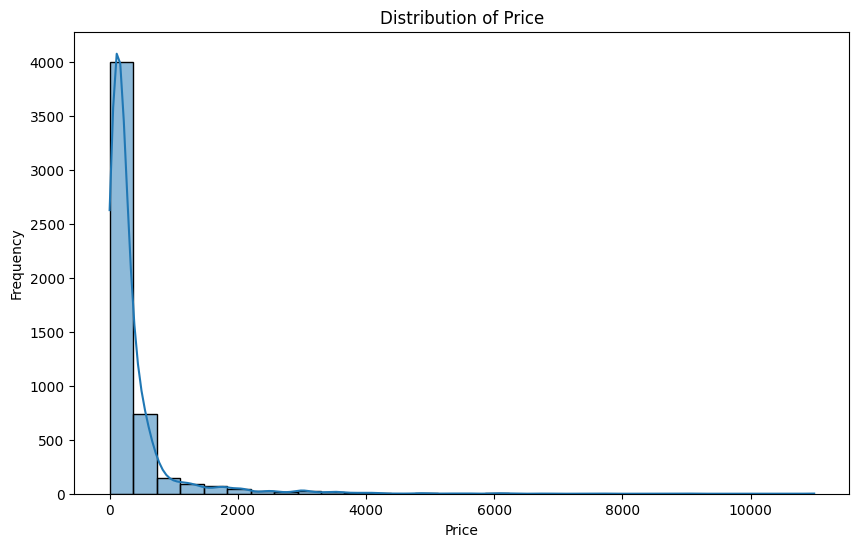

In [ ]:
plt.figure(figsize=(10, 6)) # Create a new figure for the plot with a specified size
sns.histplot(df['Price'], bins=30, kde=True) # Create a histogram of the 'Price' column with 30 bins and a KDE line

# 3. Give the plot a title and labels
plt.title('Distribution of Price') # Set the title of the plot
plt.xlabel('Price') # Set the label for the x-axis
plt.ylabel('Frequency') # Set the label for the y-axis

# 4. Display the plot
plt.show() # Display the generated plot

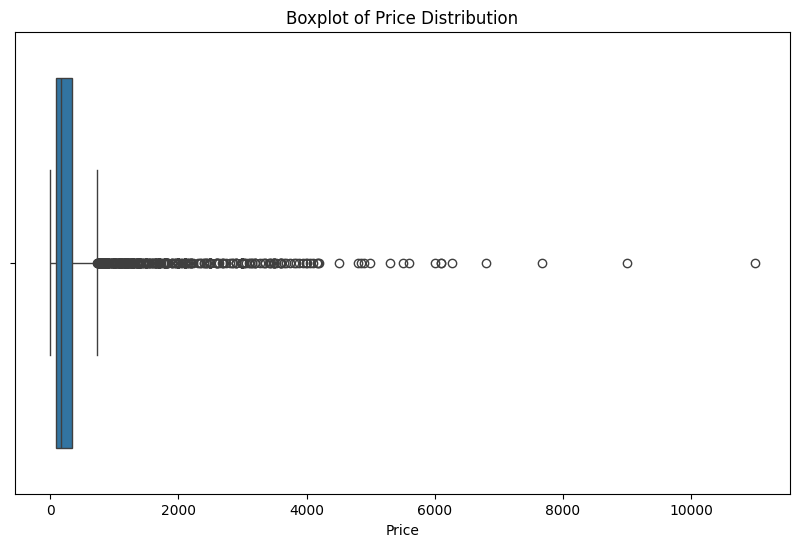

In [ ]:
plt.figure(figsize=(10, 6)) # Create a new figure for the plot with a specified size
sns.boxplot(x=df['Price']) # Create a boxplot of the 'Price' column
plt.title('Boxplot of Price Distribution') # Set the title of the plot
plt.xlabel('Price') # Set the label for the x-axis
plt.show() # Display the generated plot

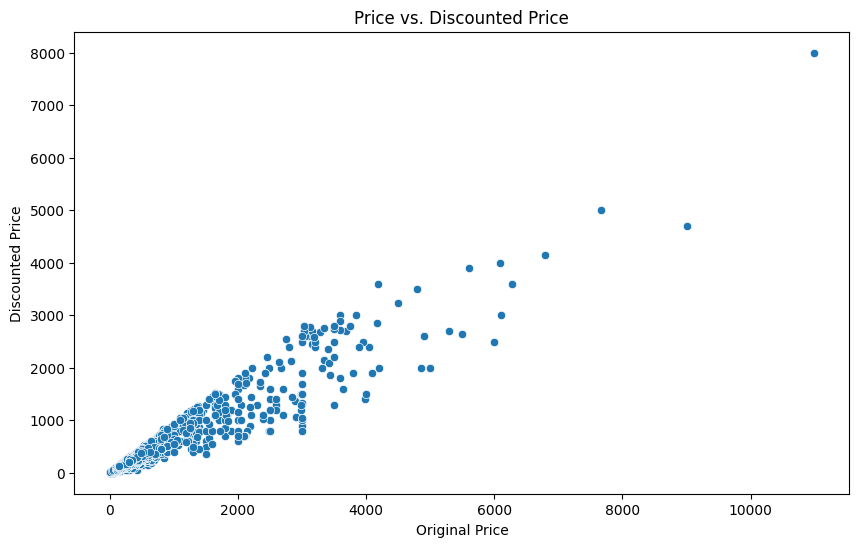

In [ ]:
plt.figure(figsize=(10, 6)) # Create a new figure for the plot with a specified size
sns.scatterplot(x='Price', y='DiscountedPrice', data=df) # Create a scatter plot of 'Price' vs 'DiscountedPrice'
plt.title('Price vs. Discounted Price') # Set the title of the plot
plt.xlabel('Original Price') # Set the label for the x-axis
plt.ylabel('Discounted Price') # Set the label for the y-axis
plt.show() # Display the generated plot

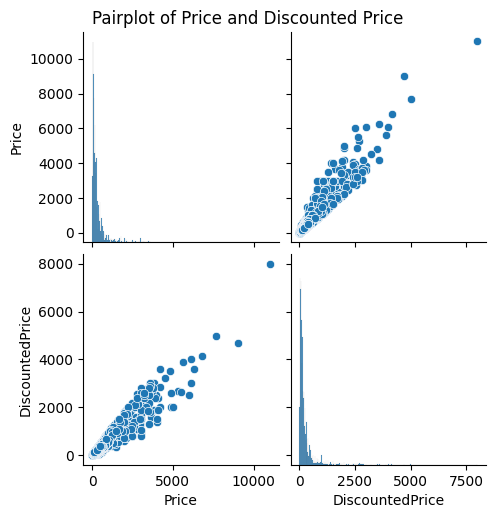

In [ ]:
sns.pairplot(df[['Price', 'DiscountedPrice']]) # Create a pairplot of 'Price' and 'DiscountedPrice'
plt.suptitle('Pairplot of Price and Discounted Price', y=1.02) # Set the main title for the pairplot
plt.show() # Display the generated pairplot

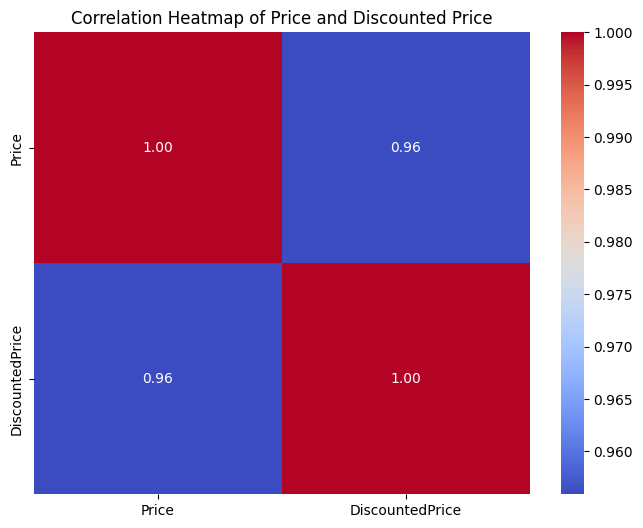

In [ ]:
sns.heatmap(df[['Price', 'DiscountedPrice']].corr(), annot=True, cmap='coolwarm', fmt=".2f") # Create a heatmap of the correlation between 'Price' and 'DiscountedPrice'
plt.title('Correlation Heatmap of Price and Discounted Price') # Set the title of the heatmap
plt.show() # Display the generated heatmap

In [ ]:
# Calculate the count of each unique value in the 'Category' column
category_counts = df['Category'].value_counts()
# Print the category counts
print(category_counts)

Category
Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    880
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Baby & Kids                         4
Motorbike Helmets                   4
Kitchen Aprons                      3
Unknown                             3
Geep                                3
Joyo Plastics                       2
Butterfly                           2
Computer Accessories                2
Wonderchef                          1
Pig

In [ ]:
# Calculate the count of each unique value in the 'SubCategory' column and display the top 20
subcategory_counts = df['SubCategory'].value_counts().head(20)
# Print the top 20 subcategory counts
print(subcategory_counts)

SubCategory
Snacks & Farsans           302
Beverages                  282
Skin Care                  222
Masala & Spices            204
Hair Care                  160
Specials                   157
Bed & Bath                 150
Dairy                      147
Packaged Food              135
Health & Wellness          129
Personal Care/Lip Care     128
Cookware & Serveware       121
Biscuits & Cookies         119
Personal Care/Face Care    115
Cooking Oil                106
Grocery/Masala & Spices     93
Detergent & Fabric Care     90
Sweets                      89
Freshener & Repellents      84
Cleaning Tools              83
Name: count, dtype: int64
